# Decision Tree Classifier

### `NOTE` - We should not do feature Scaling for Decision Tree

# Dataset Info - 
### **With the help of sepal length , sepal width ,petal length ,petal width features I have to find out whether flower Iris-Setosa Or Iris-Versicolour Or Iris-Virginica IS.**

## **this is a Binary Classification Problem**

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                

In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris # for dataset
from sklearn.tree import DecisionTreeClassifier # Decision Tree Classifier
from sklearn import tree # to visualize my Decision tree nodes leafs and branches
from sklearn.metrics import accuracy_score,classification_report # to check accuracy of the model
from sklearn.datasets import load_breast_cancer # For Decision Tree Implementations

In [90]:
dataset = load_iris()
dataset.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [91]:
dataset.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [92]:
df = pd.DataFrame(data=dataset.data,columns=dataset.feature_names)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [93]:
# Adding target column to data frame
df['target'] = dataset.target
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


## EDA


### Insights
- my target feature is not imabalanced
- columns dtype is already fixed
- don't have any null values
- petal length and petal width are highly correlated
- sepal length and sepal width are normally distributed
- values are not spread so scaling is not important

In [94]:
df['target'].value_counts(normalize=True)*100

target
0    33.333333
1    33.333333
2    33.333333
Name: proportion, dtype: float64

In [95]:
df.nunique()


sepal length (cm)    35
sepal width (cm)     23
petal length (cm)    43
petal width (cm)     22
target                3
dtype: int64

In [96]:
df.isnull().sum()


sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64

In [97]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


In [98]:
df.describe()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


### Visualizing the data


C:\Users\Gyanprakash\AppData\Local\Temp\ipykernel_11672\562312433.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


array([[<Axes: title={'center': 'sepal length (cm)'}>,
        <Axes: title={'center': 'sepal width (cm)'}>],
       [<Axes: title={'center': 'petal length (cm)'}>,
        <Axes: title={'center': 'petal width (cm)'}>],
       [<Axes: title={'center': 'target'}>, <Axes: >]], dtype=object)

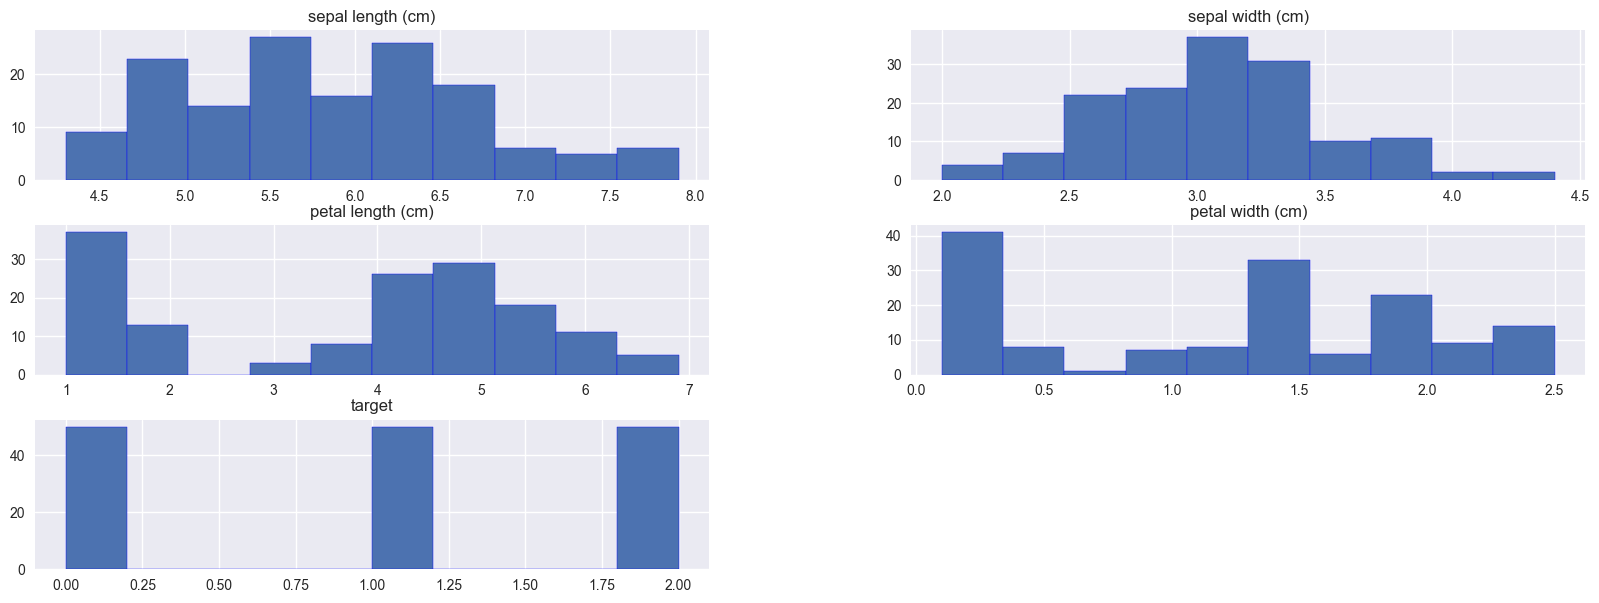

In [99]:
plt.style.use('seaborn')
df.hist(figsize=(20,7),ec='b')

<Axes: xlabel='sepal width (cm)', ylabel='Count'>

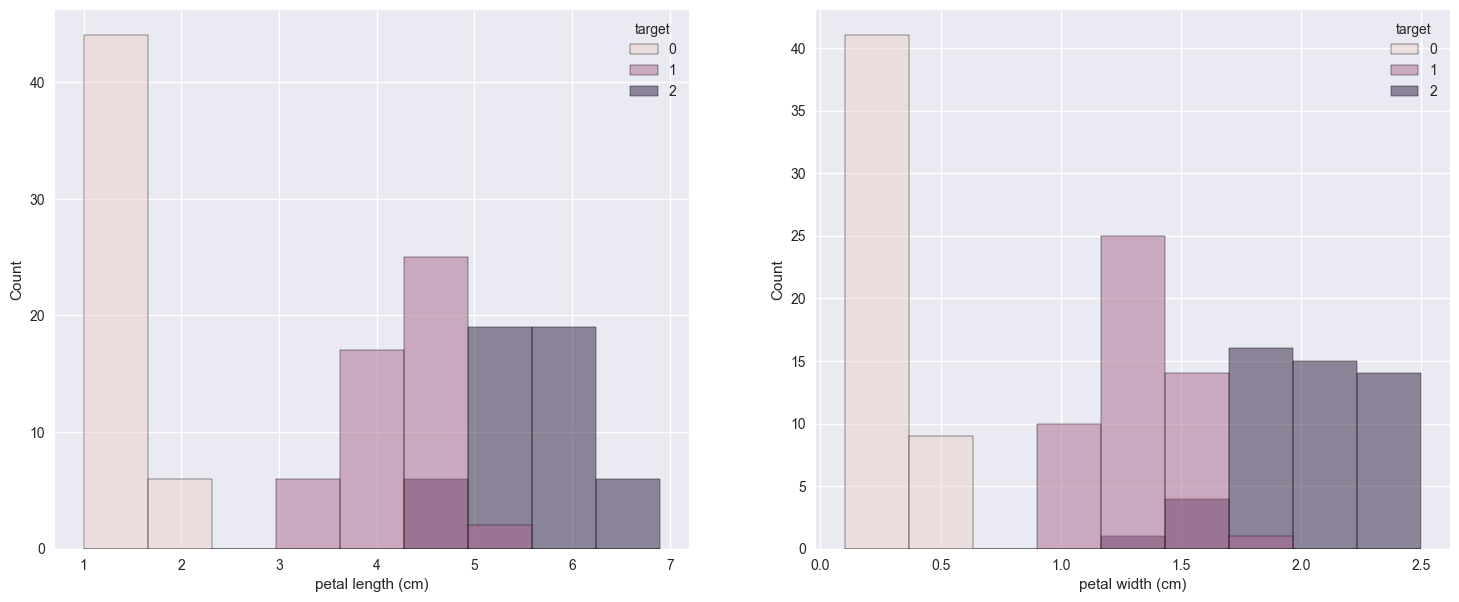

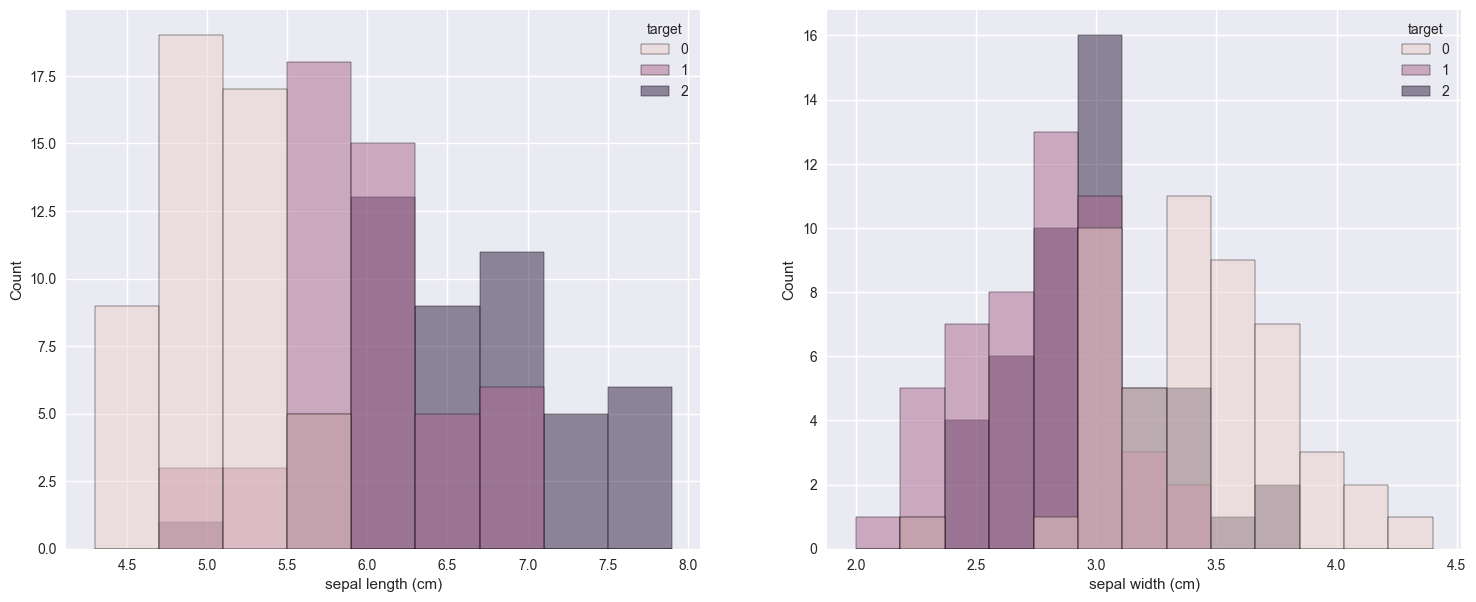

In [100]:
plt.subplots(1,2,figsize = (18,7))
plt.subplot(1,2,1)
sns.histplot(x=df['petal length (cm)'],hue='target',data=df)
plt.subplot(1,2,2)
sns.histplot(x=df['petal width (cm)'],hue='target',data=df)


plt.subplots(1,2,figsize = (18,7))
plt.subplot(1,2,1)
sns.histplot(x=df['sepal length (cm)'],hue='target',data=df)
plt.subplot(1,2,2)
sns.histplot(x=df['sepal width (cm)'],hue='target',data=df)


In [101]:
df.corr()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
sepal length (cm),1.000000,-0.117570,0.871754,0.817941,0.782561
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126,-0.426658
petal length (cm),0.871754,-0.428440,1.000000,0.962865,0.949035
petal width (cm),0.817941,-0.366126,0.962865,1.000000,0.956547
target,0.782561,-0.426658,0.949035,0.956547,1.000000


<Axes: >

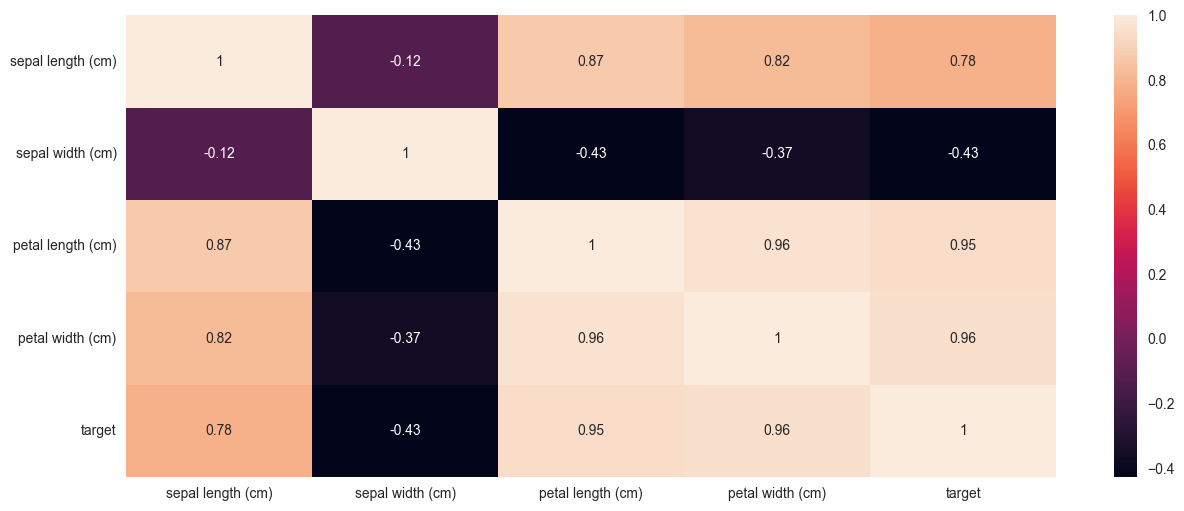

In [102]:
plt.figure(figsize=(15,6))
sns.heatmap(df.corr(),annot=True)

## Model Training

In [103]:
X = df.iloc[:,:-1]
y = dataset.target

In [104]:
X,y

(     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
 0                  5.1               3.5                1.4               0.2
 1                  4.9               3.0                1.4               0.2
 2                  4.7               3.2                1.3               0.2
 3                  4.6               3.1                1.5               0.2
 4                  5.0               3.6                1.4               0.2
 ..                 ...               ...                ...               ...
 145                6.7               3.0                5.2               2.3
 146                6.3               2.5                5.0               1.9
 147                6.5               3.0                5.2               2.0
 148                6.2               3.4                5.4               2.3
 149                5.9               3.0                5.1               1.8
 
 [150 rows x 4 columns],
 array([0, 0, 0, 0, 0, 0,

In [105]:
## Train Test Split
X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=0.33, random_state=42)

In [106]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((100, 4), (50, 4), (100,), (50,))

# Post Pruning

In [107]:
treeClassifier = DecisionTreeClassifier()
treeClassifier

DecisionTreeClassifier()

In [108]:
treeClassifier.fit(X_train,y_train)

DecisionTreeClassifier()

[Text(0.5416666666666666, 0.9285714285714286, 'node #0\nx[3] <= 0.8\ngini = 0.666\nsamples = 100\nvalue = [31, 35, 34]'),
 Text(0.4583333333333333, 0.7857142857142857, 'node #1\ngini = 0.0\nsamples = 31\nvalue = [31, 0, 0]'),
 Text(0.625, 0.7857142857142857, 'node #2\nx[3] <= 1.75\ngini = 0.5\nsamples = 69\nvalue = [0, 35, 34]'),
 Text(0.4166666666666667, 0.6428571428571429, 'node #3\nx[2] <= 5.35\ngini = 0.188\nsamples = 38\nvalue = [0, 34, 4]'),
 Text(0.3333333333333333, 0.5, 'node #4\nx[0] <= 4.95\ngini = 0.105\nsamples = 36\nvalue = [0, 34, 2]'),
 Text(0.16666666666666666, 0.35714285714285715, 'node #5\nx[1] <= 2.45\ngini = 0.5\nsamples = 2\nvalue = [0, 1, 1]'),
 Text(0.08333333333333333, 0.21428571428571427, 'node #6\ngini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(0.25, 0.21428571428571427, 'node #7\ngini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.5, 0.35714285714285715, 'node #8\nx[2] <= 4.95\ngini = 0.057\nsamples = 34\nvalue = [0, 33, 1]'),
 Text(0.4166666666666667, 

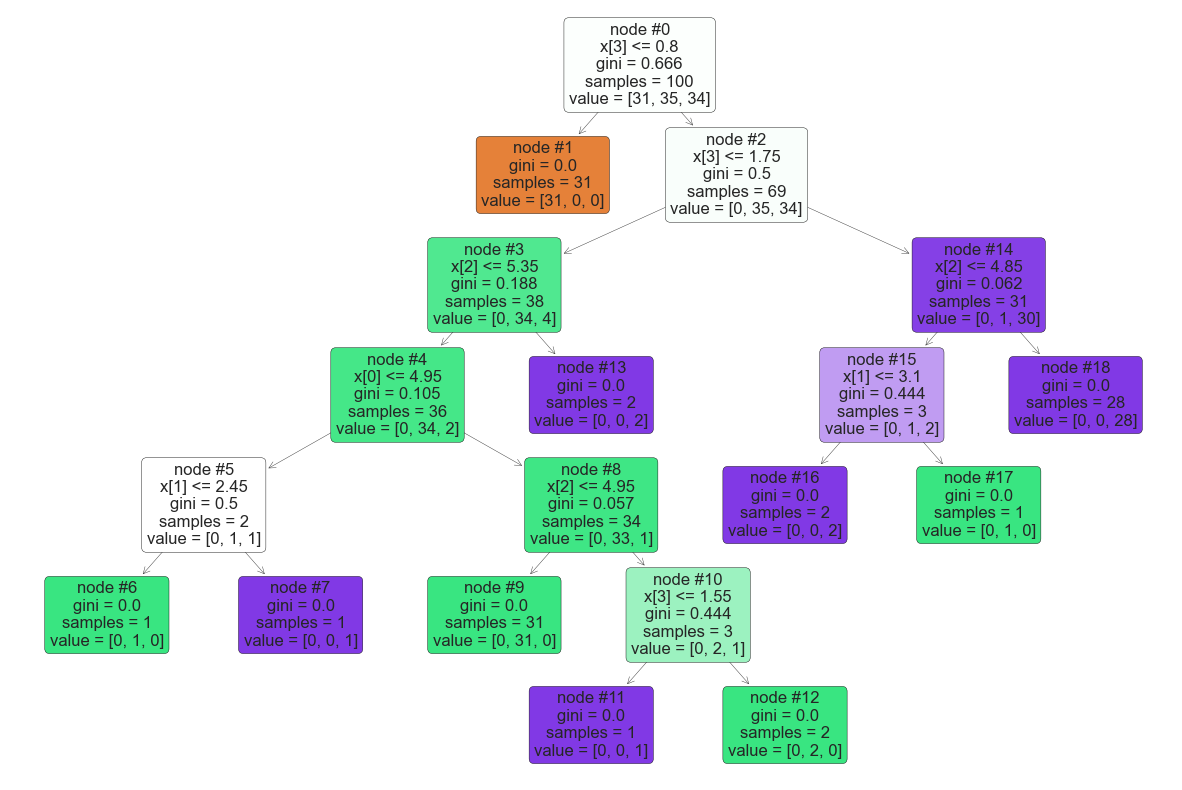

In [109]:
plt.figure(figsize=(15,10))
tree.plot_tree(treeClassifier,filled=True,node_ids=True,rounded=True,
               fontsize=12
               )

#### I can elvaluate that in node#3 and node#14 one value is dominating so instead of further splits I can simply prone(Cut) tree's branch

In [110]:
# Post Pruning with max_depth = 2
treeClassifier1 = DecisionTreeClassifier(max_depth=2)

In [111]:
treeClassifier1.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=2)

[Text(0.4, 0.8333333333333334, 'node #0\nx[3] <= 0.8\ngini = 0.666\nsamples = 100\nvalue = [31, 35, 34]'),
 Text(0.2, 0.5, 'node #1\ngini = 0.0\nsamples = 31\nvalue = [31, 0, 0]'),
 Text(0.6, 0.5, 'node #2\nx[3] <= 1.75\ngini = 0.5\nsamples = 69\nvalue = [0, 35, 34]'),
 Text(0.4, 0.16666666666666666, 'node #3\ngini = 0.188\nsamples = 38\nvalue = [0, 34, 4]'),
 Text(0.8, 0.16666666666666666, 'node #4\ngini = 0.062\nsamples = 31\nvalue = [0, 1, 30]')]

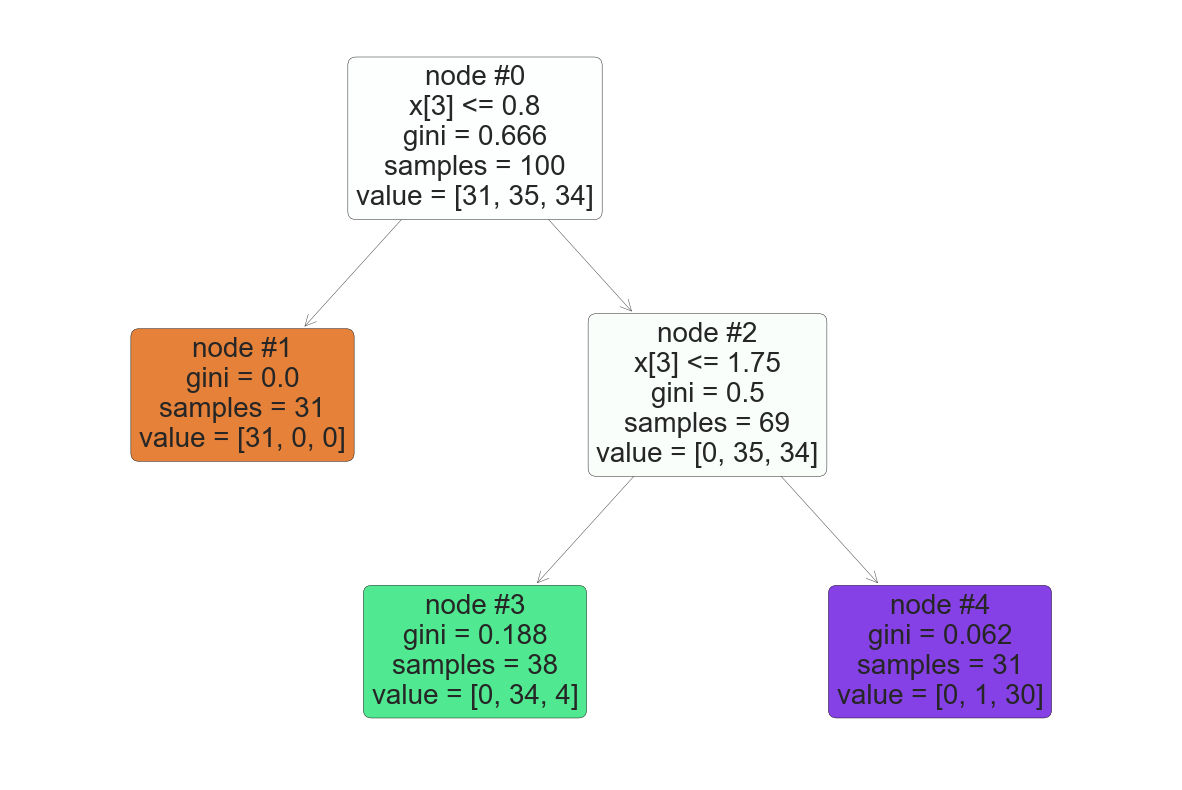

In [112]:
plt.figure(figsize=(15,10))
tree.plot_tree(treeClassifier1,filled=True,node_ids=True,rounded=True,
               fontsize=20
               )

## Prediction 
After Post Pruning


In [113]:
y_pred = treeClassifier1.predict(X_test)

In [114]:
accuracy_score(y_test,y_pred)

0.98

In [115]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.94      1.00      0.97        15
           2       1.00      0.94      0.97        16

    accuracy                           0.98        50
   macro avg       0.98      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50



## Prediction 
Before Post Pruning


In [116]:
y_pred = treeClassifier.predict(X_test)


In [117]:
accuracy_score(y_test,y_pred)

1.0

In [118]:
print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        15
           2       1.00      1.00      1.00        16

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50



# Breast Cancer 

In [119]:
Cancerdf = load_breast_cancer()

In [120]:
Cancerdf.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [121]:
print(Cancerdf.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [122]:
Cancerdf.target_names

array(['malignant', 'benign'], dtype='<U9')

In [123]:
df1 = pd.DataFrame(data=Cancerdf.data,columns=Cancerdf.feature_names)

In [124]:
df1

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [125]:
## segregating Dependent and independent features
X1 = df1
y1 = Cancerdf.target
y1.shape,X1.shape

((569,), (569, 30))

In [126]:
# Train test split
X_train1, X_test1, y_train1, y_test1 = train_test_split(
     X, y, test_size=0.25, random_state=42)

I cannot understand what this data is acctually telling about but still I just have to practice Decision tree

In [127]:
classifier2 = DecisionTreeClassifier()
classifier2

DecisionTreeClassifier()

In [128]:
classifier2.fit(X_train1,y_train1)

DecisionTreeClassifier()

In [129]:
df1.columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension'],
      dtype='object')

# Post Pruning

[Text(0.3076923076923077, 0.9285714285714286, 'node #0\nmean area <= 0.8\ngini = 0.666\nsamples = 112\nvalue = [35, 39, 38]'),
 Text(0.23076923076923078, 0.7857142857142857, 'node #1\ngini = 0.0\nsamples = 35\nvalue = [35, 0, 0]'),
 Text(0.38461538461538464, 0.7857142857142857, 'node #2\nmean perimeter <= 4.75\ngini = 0.5\nsamples = 77\nvalue = [0, 39, 38]'),
 Text(0.15384615384615385, 0.6428571428571429, 'node #3\nmean area <= 1.65\ngini = 0.056\nsamples = 35\nvalue = [0, 34, 1]'),
 Text(0.07692307692307693, 0.5, 'node #4\ngini = 0.0\nsamples = 34\nvalue = [0, 34, 0]'),
 Text(0.23076923076923078, 0.5, 'node #5\ngini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.6153846153846154, 0.6428571428571429, 'node #6\nmean area <= 1.75\ngini = 0.21\nsamples = 42\nvalue = [0, 5, 37]'),
 Text(0.38461538461538464, 0.5, 'node #7\nmean perimeter <= 4.95\ngini = 0.5\nsamples = 8\nvalue = [0, 4, 4]'),
 Text(0.3076923076923077, 0.35714285714285715, 'node #8\ngini = 0.0\nsamples = 2\nvalue = [0, 2, 0

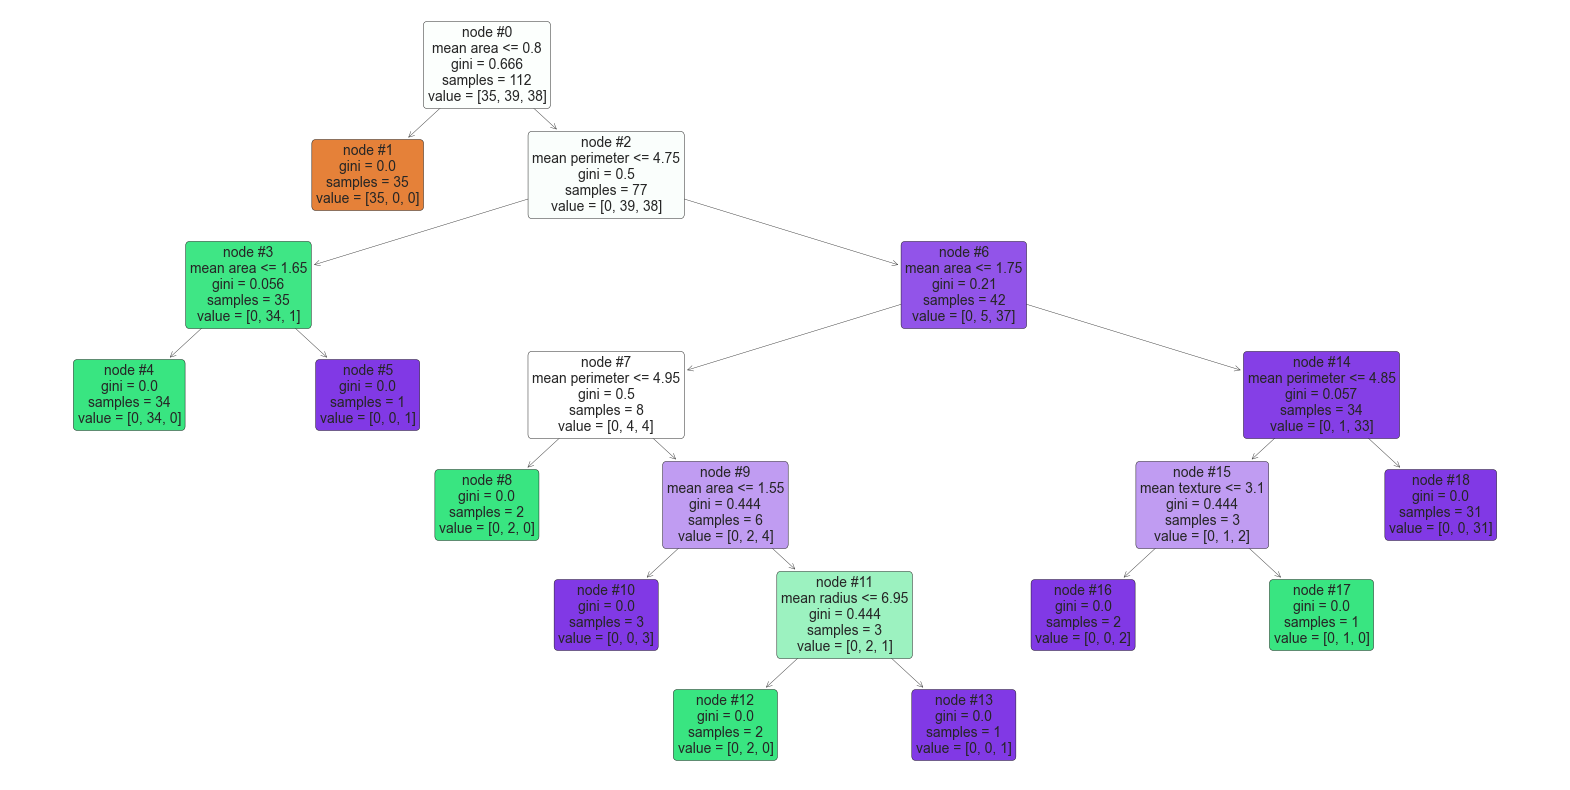

In [130]:
# visualizing the tree
plt.figure(figsize=(20,10))
tree.plot_tree(classifier2,node_ids=True,filled=True,feature_names=['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension'], fontsize=10,rounded=True)

[Text(0.3076923076923077, 0.9285714285714286, 'node #0\nx[3] <= 0.8\ngini = 0.666\nsamples = 112\nvalue = [35, 39, 38]'),
 Text(0.23076923076923078, 0.7857142857142857, 'node #1\ngini = 0.0\nsamples = 35\nvalue = [35, 0, 0]'),
 Text(0.38461538461538464, 0.7857142857142857, 'node #2\nx[2] <= 4.75\ngini = 0.5\nsamples = 77\nvalue = [0, 39, 38]'),
 Text(0.15384615384615385, 0.6428571428571429, 'node #3\nx[3] <= 1.65\ngini = 0.056\nsamples = 35\nvalue = [0, 34, 1]'),
 Text(0.07692307692307693, 0.5, 'node #4\ngini = 0.0\nsamples = 34\nvalue = [0, 34, 0]'),
 Text(0.23076923076923078, 0.5, 'node #5\ngini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.6153846153846154, 0.6428571428571429, 'node #6\nx[3] <= 1.75\ngini = 0.21\nsamples = 42\nvalue = [0, 5, 37]'),
 Text(0.38461538461538464, 0.5, 'node #7\nx[2] <= 4.95\ngini = 0.5\nsamples = 8\nvalue = [0, 4, 4]'),
 Text(0.3076923076923077, 0.35714285714285715, 'node #8\ngini = 0.0\nsamples = 2\nvalue = [0, 2, 0]'),
 Text(0.46153846153846156, 0.3

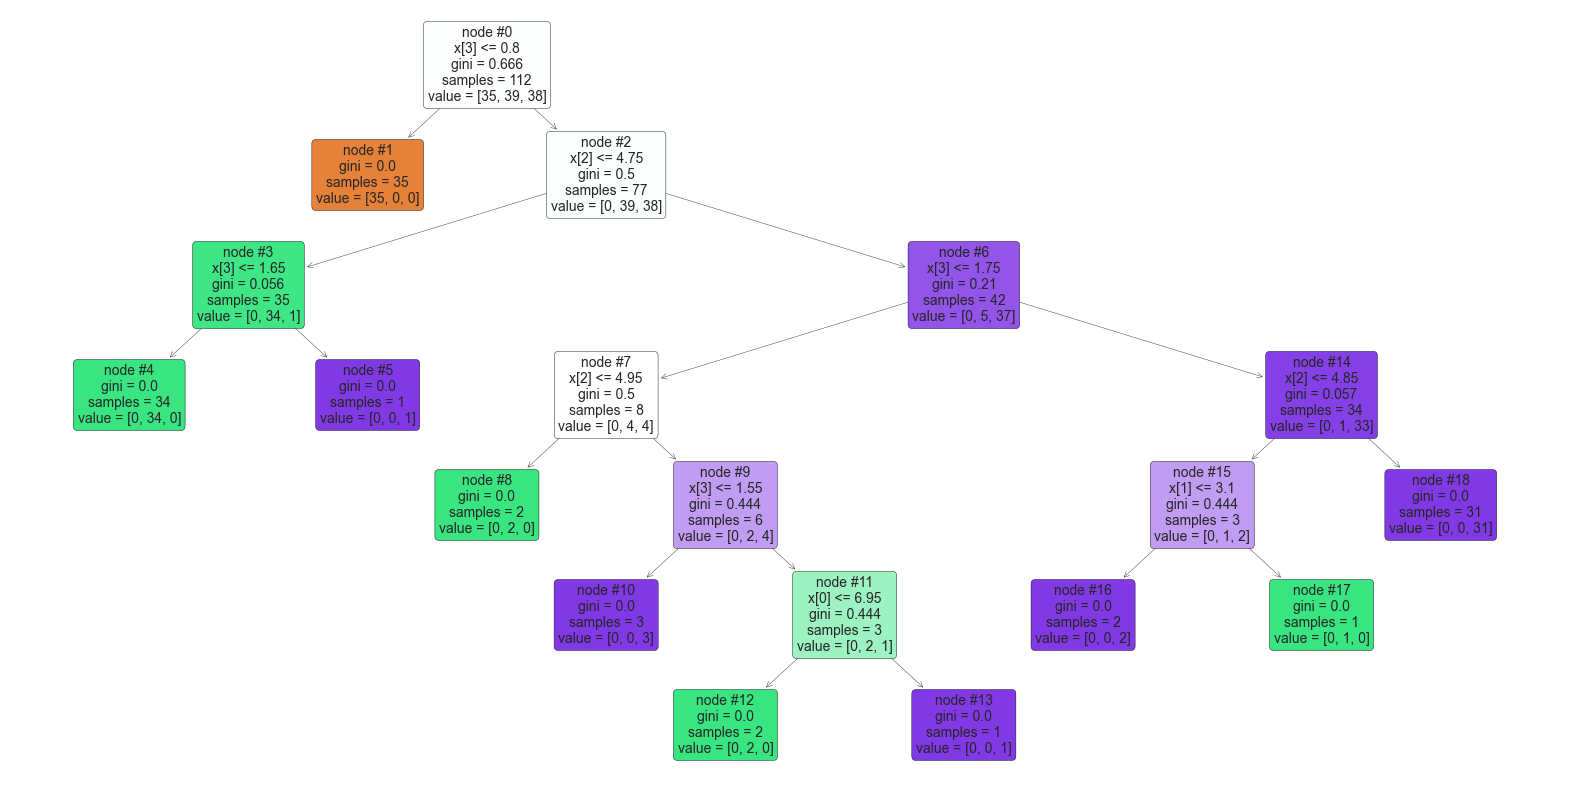

In [131]:
# visualizing the tree
plt.figure(figsize=(20,10))
tree.plot_tree(classifier2,node_ids=True,filled=True, fontsize=10,rounded=True)

In [132]:
classifier_Entropy = DecisionTreeClassifier(criterion='entropy')
classifier_Entropy

DecisionTreeClassifier(criterion='entropy')

In [133]:
classifier_Entropy.fit(X_train1,y_train1)

DecisionTreeClassifier(criterion='entropy')

In [134]:
y_pred1=classifier_Entropy.predict(X_test1)

[Text(0.3333333333333333, 0.9375, 'node #0\nmean perimeter <= 2.45\nentropy = 1.583\nsamples = 112\nvalue = [35, 39, 38]'),
 Text(0.2222222222222222, 0.8125, 'node #1\nentropy = 0.0\nsamples = 35\nvalue = [35, 0, 0]'),
 Text(0.4444444444444444, 0.8125, 'node #2\nmean perimeter <= 4.75\nentropy = 1.0\nsamples = 77\nvalue = [0, 39, 38]'),
 Text(0.2222222222222222, 0.6875, 'node #3\nmean area <= 1.65\nentropy = 0.187\nsamples = 35\nvalue = [0, 34, 1]'),
 Text(0.1111111111111111, 0.5625, 'node #4\nentropy = 0.0\nsamples = 34\nvalue = [0, 34, 0]'),
 Text(0.3333333333333333, 0.5625, 'node #5\nentropy = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.6666666666666666, 0.6875, 'node #6\nmean perimeter <= 5.15\nentropy = 0.527\nsamples = 42\nvalue = [0, 5, 37]'),
 Text(0.5555555555555556, 0.5625, 'node #7\nmean area <= 1.75\nentropy = 0.896\nsamples = 16\nvalue = [0, 5, 11]'),
 Text(0.3333333333333333, 0.4375, 'node #8\nmean texture <= 2.35\nentropy = 0.918\nsamples = 6\nvalue = [0, 4, 2]'),
 Te

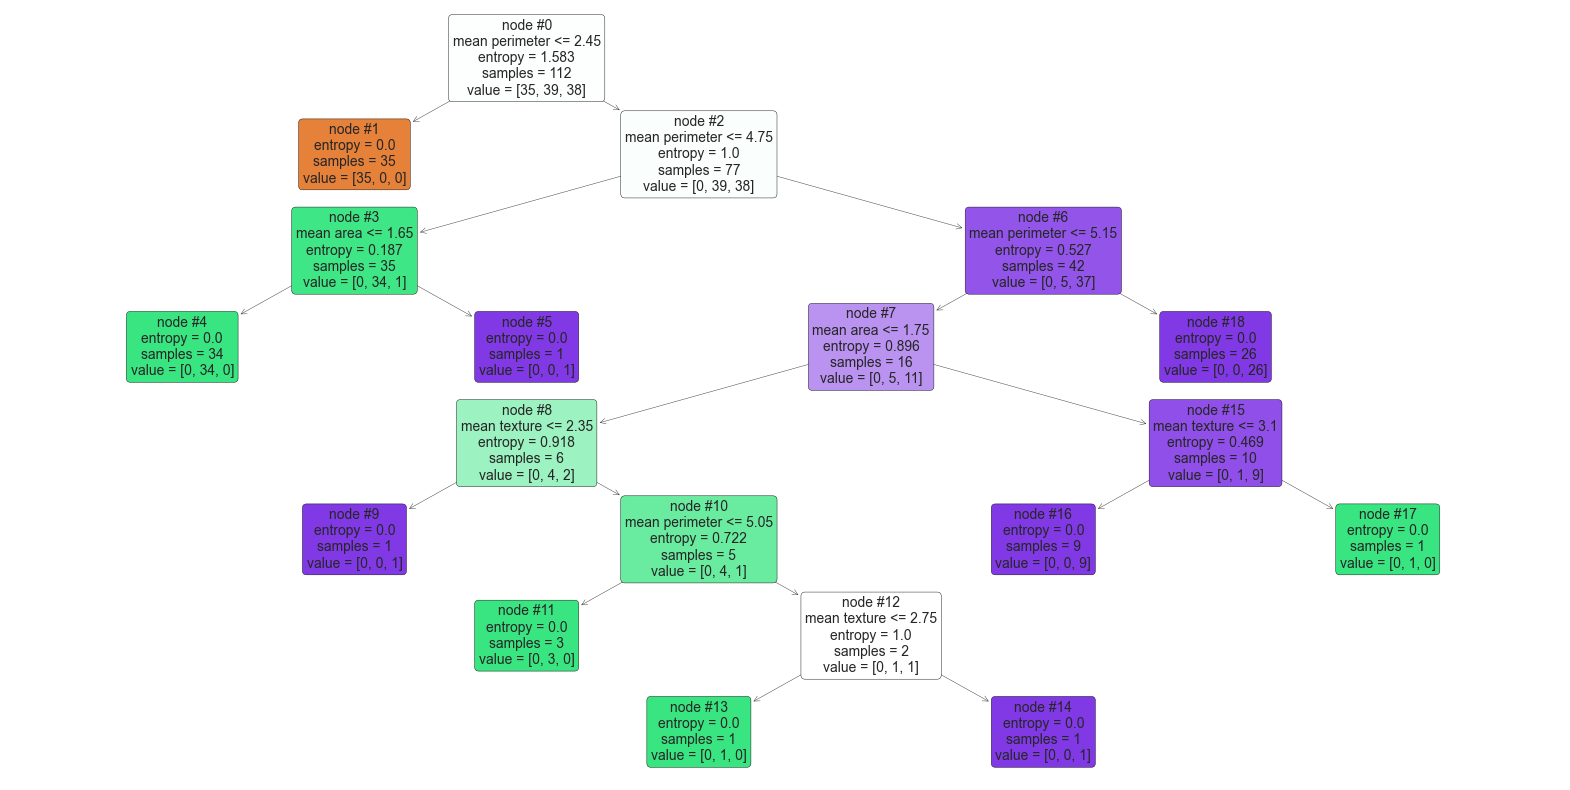

In [135]:
# visualizing the tree
plt.figure(figsize=(20,10))
tree.plot_tree(classifier_Entropy,node_ids=True,filled=True, fontsize=10,rounded=True,feature_names=['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension'])

In [141]:
# Checking accuracy
accuracy_score(y_pred=y_pred1,y_true=y_test1)

0.9736842105263158

In [142]:
print(classification_report(y_test1,y_pred1))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.92      1.00      0.96        11
           2       1.00      0.92      0.96        12

    accuracy                           0.97        38
   macro avg       0.97      0.97      0.97        38
weighted avg       0.98      0.97      0.97        38



### Pruning nodes - by node #1 and node #3
because my this model is overfitted

In [143]:
classifier_Prun = DecisionTreeClassifier(max_depth=2)

In [146]:
classifier_Prun.fit(X_train1,y_train1)

DecisionTreeClassifier(max_depth=2)

In [147]:
y_pred_Prun = classifier_Prun.predict(X_test1)

In [149]:
y_pred_Prun

array([1, 0, 2, 1, 2, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0])

[Text(0.4, 0.8333333333333334, 'node #0\nmean area <= 0.8\ngini = 0.666\nsamples = 112\nvalue = [35, 39, 38]'),
 Text(0.2, 0.5, 'node #1\ngini = 0.0\nsamples = 35\nvalue = [35, 0, 0]'),
 Text(0.6, 0.5, 'node #2\nmean perimeter <= 4.75\ngini = 0.5\nsamples = 77\nvalue = [0, 39, 38]'),
 Text(0.4, 0.16666666666666666, 'node #3\ngini = 0.056\nsamples = 35\nvalue = [0, 34, 1]'),
 Text(0.8, 0.16666666666666666, 'node #4\ngini = 0.21\nsamples = 42\nvalue = [0, 5, 37]')]

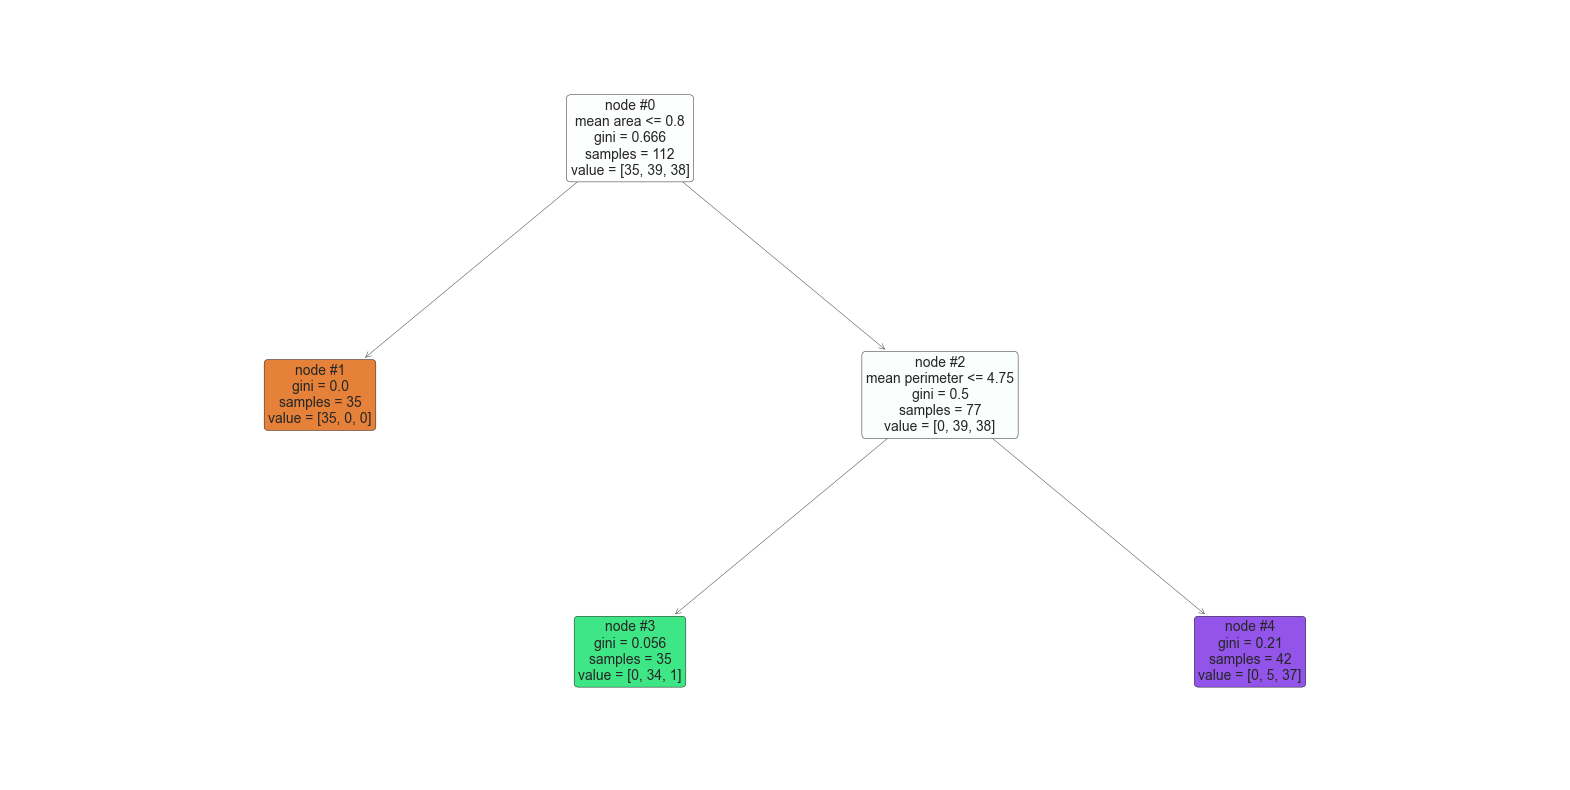

In [150]:
# visualizing the tree
plt.figure(figsize=(20,10))
tree.plot_tree(classifier_Prun,node_ids=True,filled=True, fontsize=10,rounded=True,feature_names=['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension'])